In [1]:
from keras.utils import np_utils
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Activation
import numpy as np

np.random.seed(3)

# 1. 데이터셋 준비하기

# 훈련셋과 시험셋 로딩
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

# 훈련셋과 검증셋 분리
X_val = X_train[50000:]
Y_val = Y_train[50000:]
X_train = X_train[:50000]
Y_train = Y_train[:50000]

X_train = X_train.reshape(50000, 784).astype('float32') / 255.0
X_val = X_val.reshape(10000, 784).astype('float32') / 255.0
X_test = X_test.reshape(10000, 784).astype('float32') / 255.0

# 훈련셋, 검증셋 고르기
train_rand_idxs = np.random.choice(50000, 700)
val_rand_idxs = np.random.choice(10000, 300)

X_train = X_train[train_rand_idxs]
Y_train = Y_train[train_rand_idxs]
X_val = X_val[val_rand_idxs]
Y_val = Y_val[val_rand_idxs]

# 라벨링 전환
Y_train = np_utils.to_categorical(Y_train)
Y_val = np_utils.to_categorical(Y_val)
Y_test = np_utils.to_categorical(Y_test)

# 2. 모델 구성하기
model = Sequential()
model.add(Dense(units=2, input_dim=28*28, activation='relu'))
model.add(Dense(units=10, activation='softmax'))

# 3. 모델 엮기
model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

# 4. 모델 학습시키기
hist = model.fit(X_train, Y_train, epochs=3000, batch_size=10, validation_data=(X_val, Y_val))

Epoch 1/3000
70/70 [==============================] - 1s 13ms/step - loss: 2.3036 - accuracy: 0.1066 - val_loss: 2.2934 - val_accuracy: 0.1067
Epoch 2/3000
70/70 [==============================] - 0s 2ms/step - loss: 2.2803 - accuracy: 0.1265 - val_loss: 2.2493 - val_accuracy: 0.1333
Epoch 3/3000
70/70 [==============================] - 0s 2ms/step - loss: 2.2223 - accuracy: 0.1649 - val_loss: 2.1948 - val_accuracy: 0.1300
Epoch 4/3000
70/70 [==============================] - 0s 1ms/step - loss: 2.1776 - accuracy: 0.1513 - val_loss: 2.1421 - val_accuracy: 0.1533
Epoch 5/3000
70/70 [====

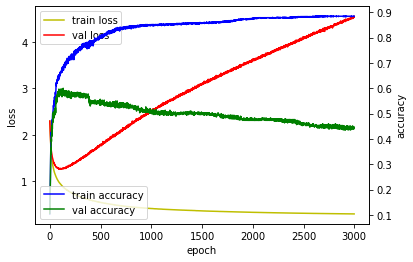

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots()

acc_ax = loss_ax.twinx()

loss_ax.plot(hist.history['loss'], 'y', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')

acc_ax.plot(hist.history['accuracy'], 'b', label='train accuracy')
acc_ax.plot(hist.history['val_accuracy'], 'g', label='val accuracy')

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuracy')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

plt.show()

In [3]:
loss_and_metrics = model.evaluate(X_test, Y_test, batch_size=32)

print('')
print('loss : ' + str(loss_and_metrics[0]))
print('accuracy : ' + str(loss_and_metrics[1]))

313/313 [==============================] - 1s 1ms/step - loss: 4.5857 - accuracy: 0.4631

loss : 4.585731506347656
accuracy : 0.46309998631477356
